In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx
import torch
import pandas as pd
from scipy import linalg
from random import sample
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = nx.read_gml('/content/drive/My Drive/netscience.gml')

Mounted at /content/drive


Modularity: 0.9646113126164122


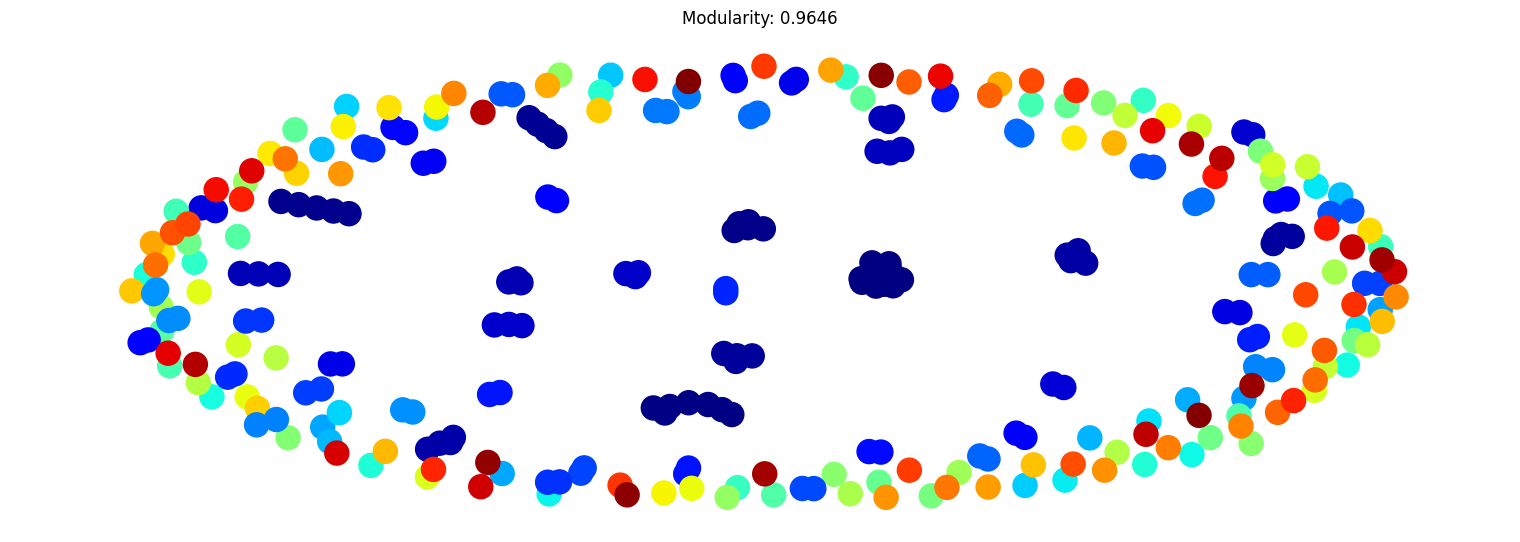

In [3]:
#####Louvain Method with Modularity


import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import random

# Get the list of nodes
all_nodes = list(data.nodes)

# Set the size of the subset you want
subset_size = 300  # Adjust as needed

# Randomly sample nodes
subset_nodes = random.sample(all_nodes, subset_size)

# Create a subgraph using only the subset of nodes
subgraph = data.subgraph(subset_nodes)

# Apply Louvain method to the subgraph
communities = community.greedy_modularity_communities(subgraph)

# # Assign a color to each node based on its community
community_map = {node: idx for idx, nodes in enumerate(communities) for node in nodes}
colors = [community_map[node] for node in subgraph.nodes]

# Calculate modularity
modularity = community.quality.modularity(subgraph, communities)

# Print the modularity
print(f"Modularity: {modularity}")

# Visualize the graph with nodes colored by community
plt.figure(figsize=(15, 5))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color=colors, with_labels=False, cmap=plt.cm.jet)
plt.title("Collaborative Network with Communities (Louvain Method)")
plt.title(f"Modularity: {modularity:.4f}")
plt.show()




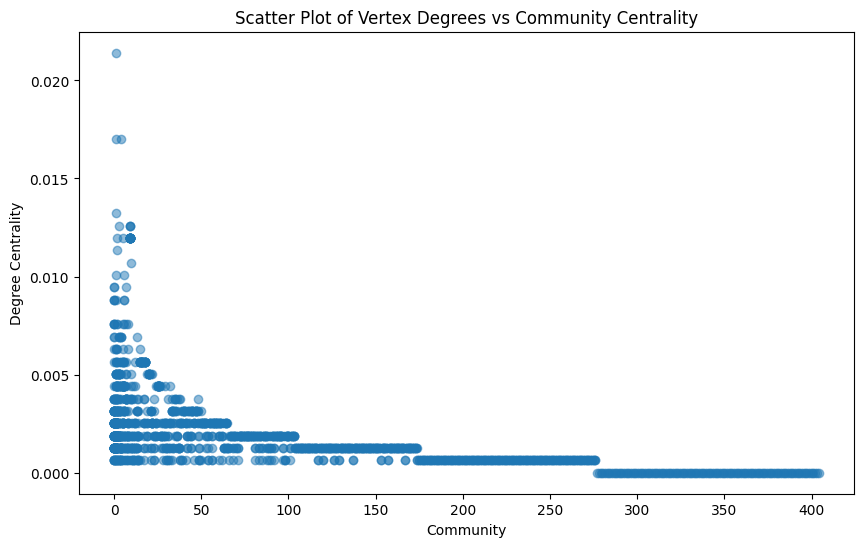

In [4]:
## Correlation between Degree Centrality and Vertex degrees

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community

# Detect communities using the Louvain method
communities = list(community.greedy_modularity_communities(data))

# Create a mapping of node to community
community_map = {node: idx for idx, nodes in enumerate(communities) for node in nodes}

# Calculate degree centrality
degree_centrality = nx.degree_centrality(data)

# Extracting data for scatter plot
y_values = [degree_centrality[node] for node in data.nodes]
x_values = [community_map[node] for node in data.nodes]

# Creating the scatter plot with switched axes
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Scatter Plot of Vertex Degrees vs Community Centrality')
plt.xlabel('Community')
plt.ylabel('Degree Centrality')
plt.show()


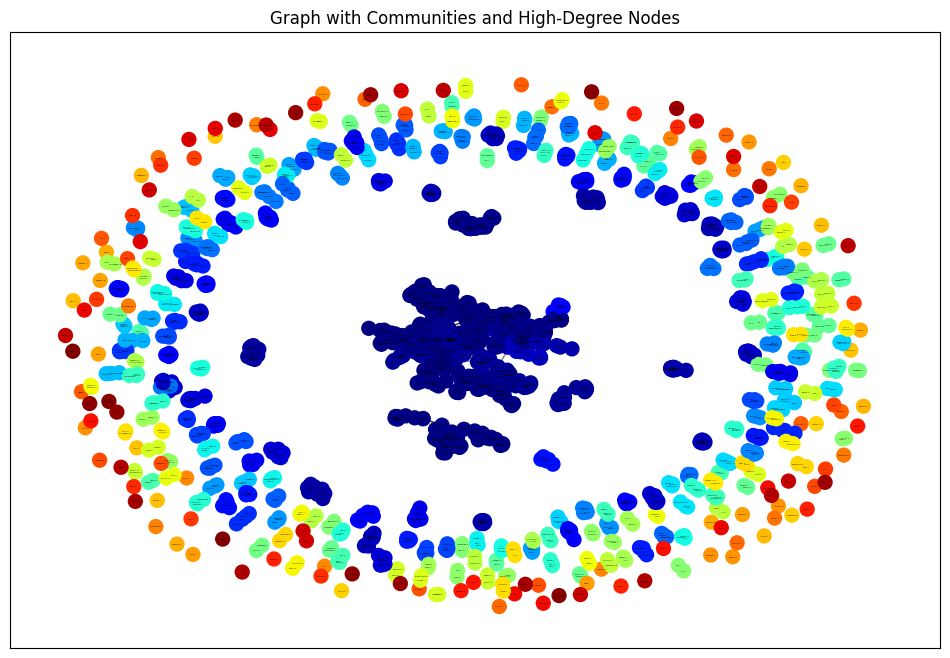

In [5]:
## Centrality measures within and between communities


import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from networkx.algorithms import centrality

# Detect communities using the Louvain method
communities = list(community.greedy_modularity_communities(data))

# Create a mapping of node to community
# community_map = {node: idx for idx, nodes in enumerate(communities) for node in nodes}
community_map = {n: i for i, com in enumerate(communities) for n in com}

# Calculate degree centrality
degree_centrality = centrality.degree_centrality(data)

# Identify nodes with high degree centrality within communities
high_degree_nodes_within_communities = {
    community_id: max(
        (node for node in community if node in degree_centrality),
        key=lambda node: degree_centrality[node]
    )
    for community_id, community in enumerate(communities)
}

# Identify bridge nodes with high degree centrality
bridge_nodes = {
    node: degree_centrality[node]
    for node in data.nodes
    if node not in high_degree_nodes_within_communities.values()
}

# Visualize the graph with nodes colored by community
pos = nx.spring_layout(data, seed=42)
node_colors = [community_map[node] for node in data.nodes]

plt.figure(figsize=(12, 8))

# Draw nodes within communities
nx.draw_networkx_nodes(data, pos, node_color=node_colors, node_size=100, cmap=plt.cm.jet)

# Draw edges
nx.draw_networkx_edges(data, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(data, pos, font_size=1)

plt.title('Graph with Communities and High-Degree Nodes')
plt.show()

# Print results
# print("Nodes with High Degree Centrality within Communities:")
# for community_id, node in high_degree_nodes_within_communities.items():
#     print(f"Community {community_id + 1}: {node}")

# print("\nBridge Nodes with High Degree Centrality:")
# for node, centrality_value in bridge_nodes.items():
#     print(f"{node}: Degree Centrality = {centrality_value}")

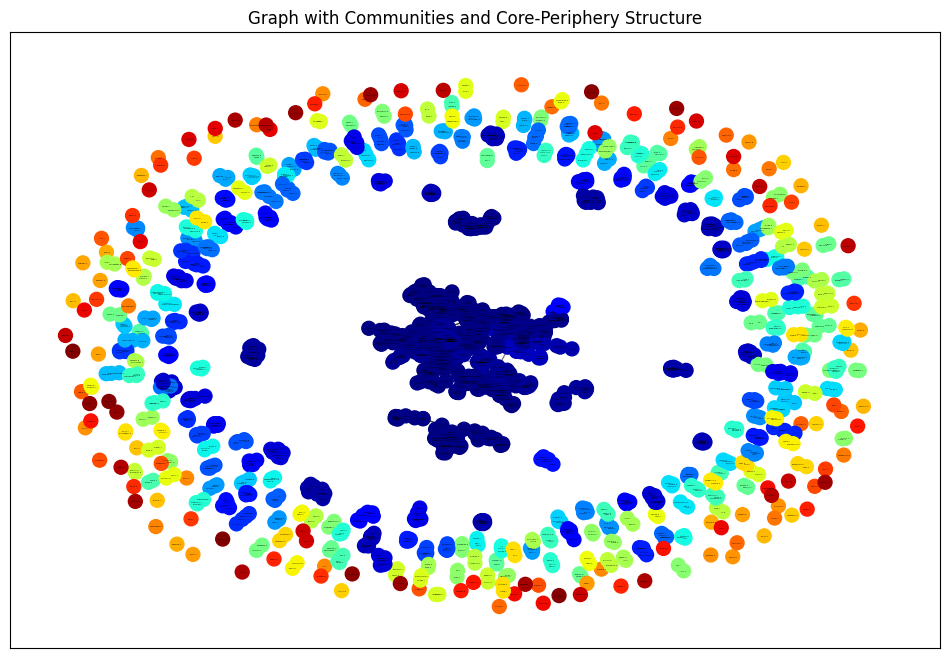

In [6]:
###Core Periphery Structure identification with degree centrality using Louvain Mehtod

import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from networkx.algorithms import centrality


# Detect communities using the Louvain method
communities = list(community.greedy_modularity_communities(data))

# Create a mapping of node to community
community_map = {node: idx for idx, nodes in enumerate(communities) for node in nodes}


# Calculate degree centrality
degree_centrality = centrality.degree_centrality(data)

# Identify core and periphery nodes within each community
core_periphery_structure = {}
for community_id, community in enumerate(communities):
    # Identify core nodes based on degree centrality
    core_nodes = {
        node: degree_centrality[node]
        for node in community
    }

    # Identify periphery nodes (remaining nodes in the community)
    periphery_nodes = set(community) - set(core_nodes.keys())

    core_periphery_structure[community_id] = {
        'core_nodes': core_nodes,
        'periphery_nodes': periphery_nodes
    }

# Visualize the graph with nodes colored by community
pos = nx.spring_layout(data, seed=42)
node_colors = [community_map[node] for node in data.nodes]

plt.figure(figsize=(12, 8))

# Draw nodes within communities
nx.draw_networkx_nodes(data, pos, node_color=node_colors, node_size=100, cmap=plt.cm.jet)

# Draw edges
nx.draw_networkx_edges(data, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(data, pos, font_size=1)

plt.title('Graph with Communities and Core-Periphery Structure')
plt.show()

# # Print Core-Periphery Structure
# for community_id, structure in core_periphery_structure.items():
#     print(f"\nCommunity {community_id + 1}:")
#     print(f"Core Nodes: {structure['core_nodes']}")
#     print(f"Periphery Nodes: {structure['periphery_nodes']}")

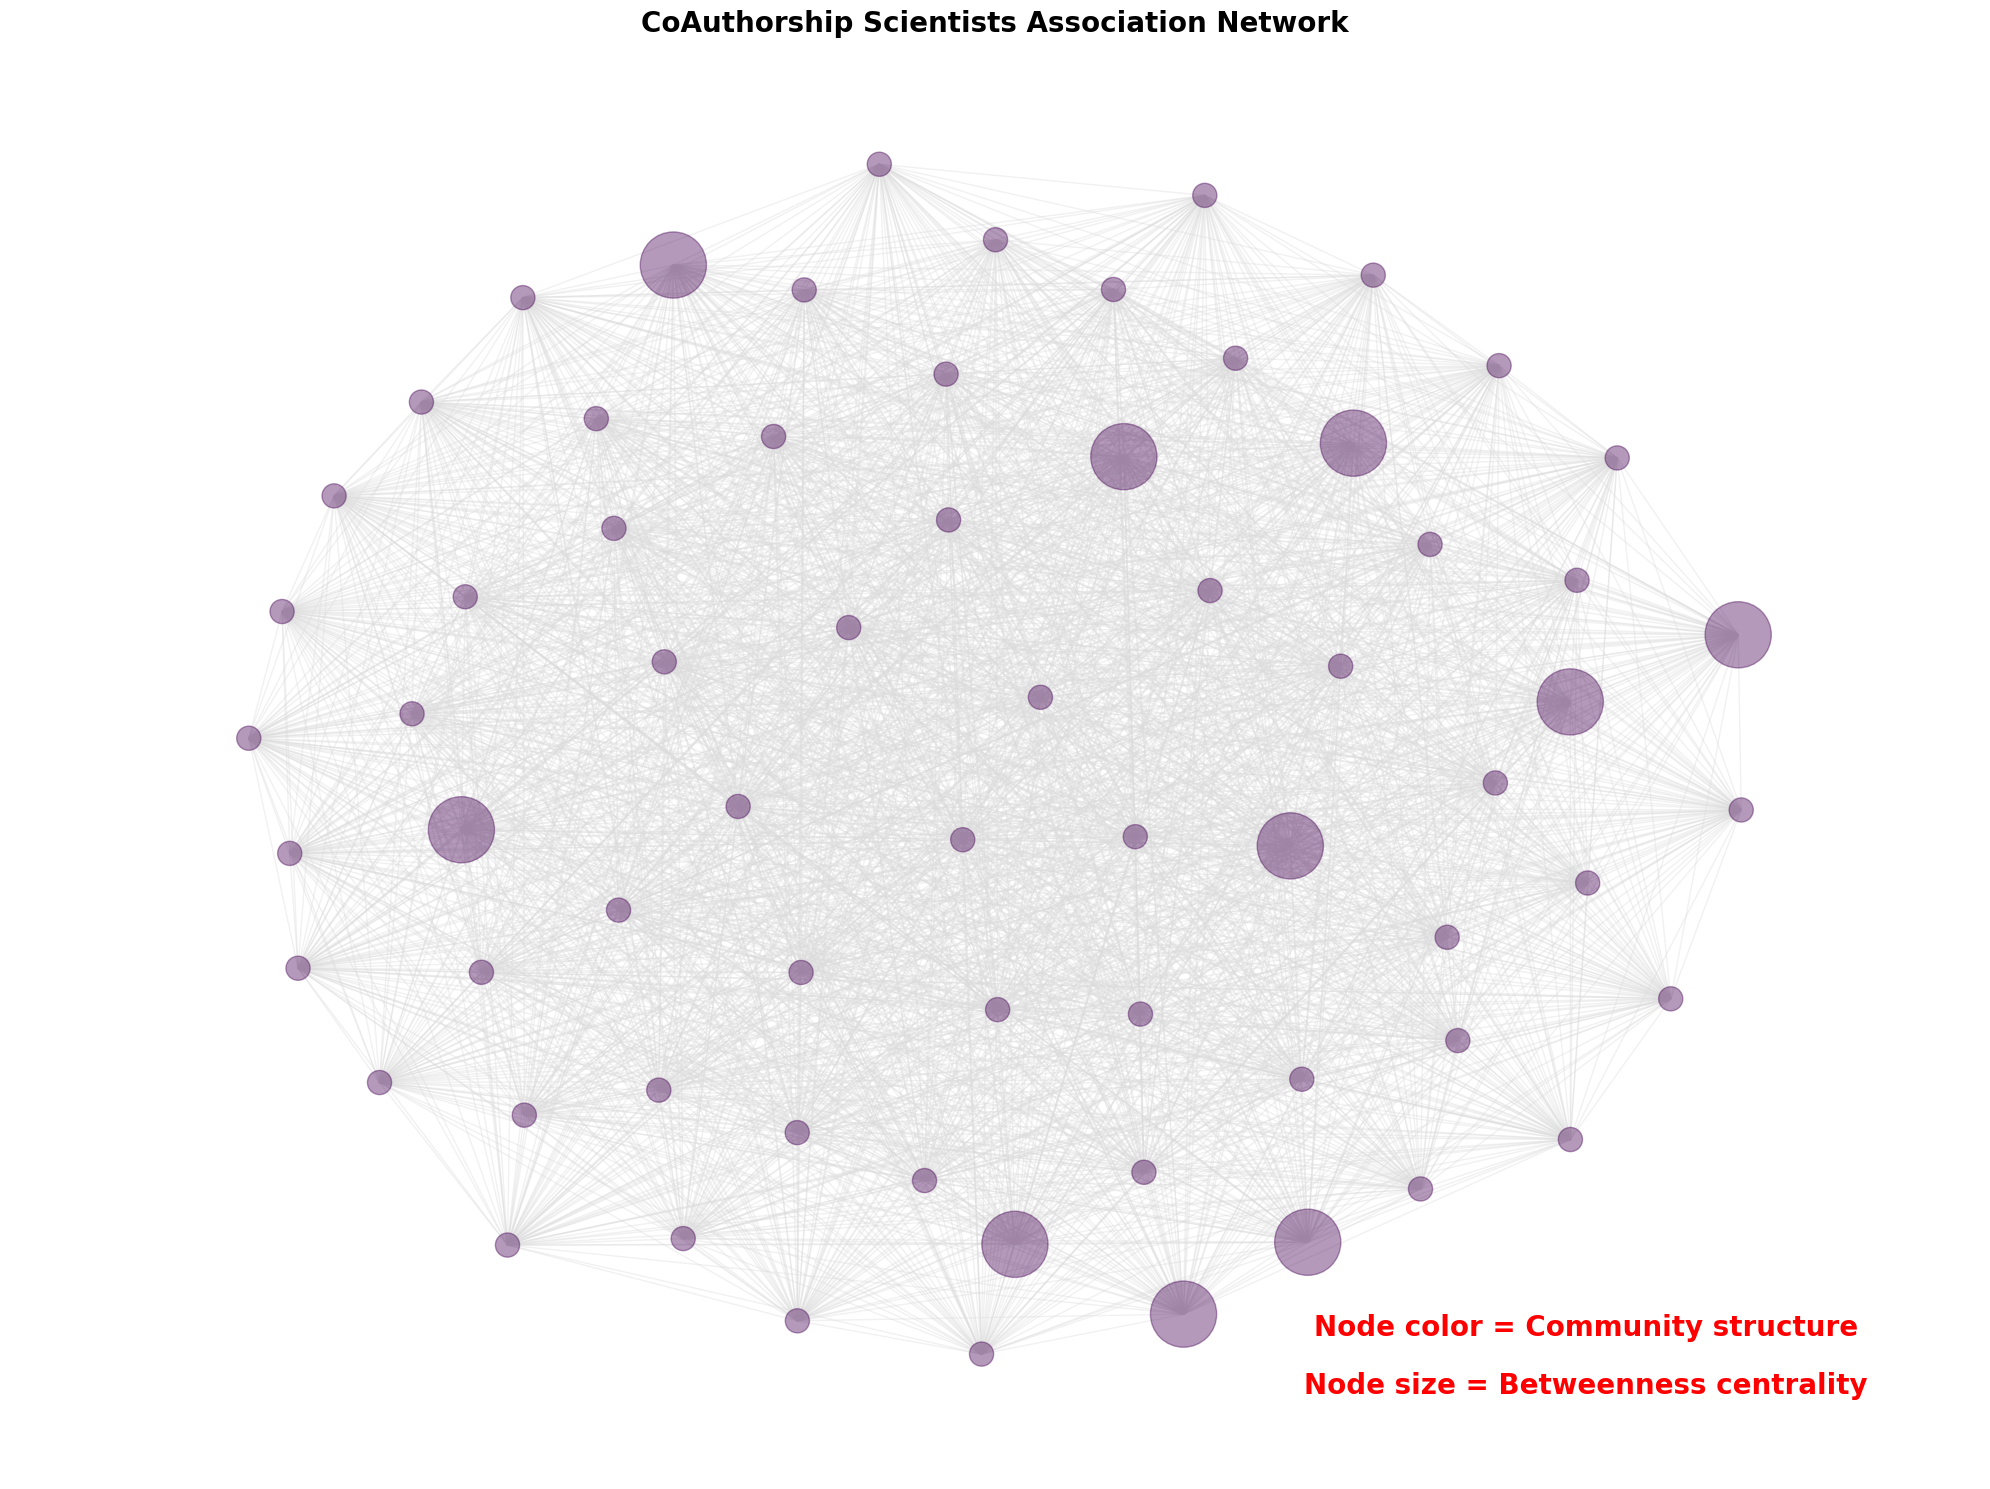

In [7]:
#Betweeness Centrality from Louvain Method

from networkx.algorithms import community, centrality

#data
scientists = list(data.nodes)

# Choose a random subset of scientists for visualization
num_scientists_to_visualize = min(200, len(scientists))
selected_scientists = random.sample(scientists, num_scientists_to_visualize)

# Create a fully connected graph for the selected scientists
G = nx.complete_graph(len(selected_scientists))

# Set node names
mapping = {i: scientist for i, scientist in enumerate(selected_scientists)}
G = nx.relabel_nodes(G, mapping)

# Remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# Remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# Apply Louvain method to the subgraph
communities = list(community.greedy_modularity_communities(G))

# # # Assign a color to each node based on its community
community_map = {n: i for i, com in enumerate(communities) for n in com}

# Compute betweenness centrality
centrality = nx.betweenness_centrality(G, k=10, endpoints=True)

# Draw the graph
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.15, seed=4572321)

node_color = [community_map[n] for n in G]
node_size = [v * 20000 for v in centrality.values()]

nx.draw_networkx(
    G,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("CoAuthorship Scientists Association Network", font)

# Change font color for legend
font["color"] = "r"
ax.text(
    0.80,
    0.10,
    "Node color = Community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "Node size = Betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

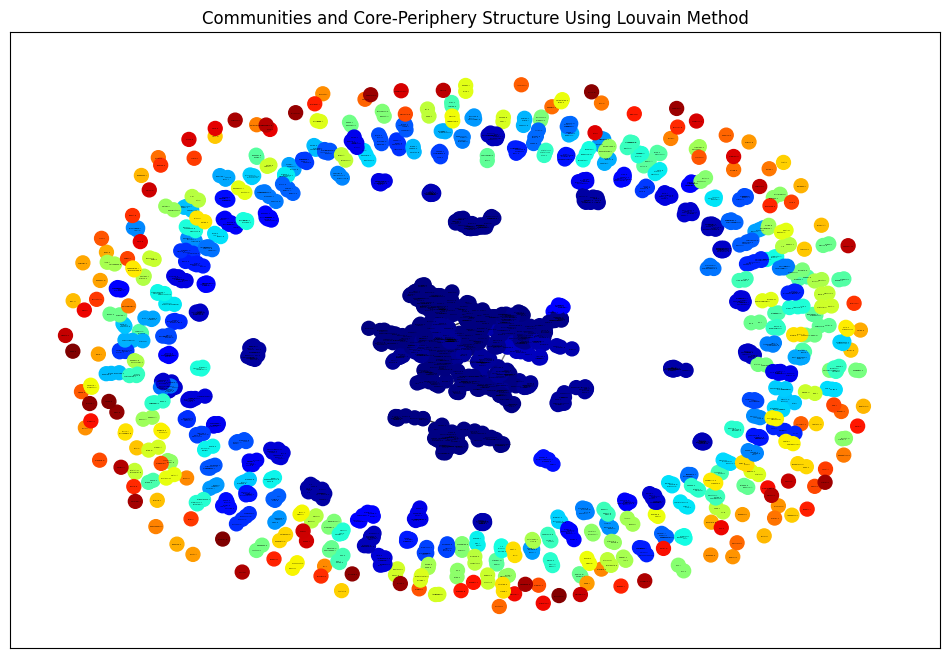

In [8]:
###Core Periphery Structure identification with betweenness centrality using Louvain method

import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community, centrality
import networkx as nx
import matplotlib.pyplot as plt

# Detect communities using the Louvain method
communities = list(community.greedy_modularity_communities(data))

# Create a mapping of node to community
community_map = {node: idx for idx, nodes in enumerate(communities) for node in nodes}

# Calculate betweenness centrality for the subgraph
betweenness_centrality = nx.betweenness_centrality(data)

# Identify core and periphery nodes within each community
core_periphery_structure = {}
for community_id, community in enumerate(communities):
    # Identify core nodes based on degree centrality
    core_nodes = {
        node: betweenness_centrality[node]
        for node in community
    }

    # Identify periphery nodes (remaining nodes in the community)
    periphery_nodes = set(community) - set(core_nodes.keys())

    core_periphery_structure[community_id] = {
        'core_nodes': core_nodes,
        'periphery_nodes': periphery_nodes
    }

# Visualize the subgraph with nodes colored by community
pos = nx.spring_layout(data, seed=42)
node_colors = [community_map[node] for node in data.nodes]

plt.figure(figsize=(12, 8))

# Draw nodes within communities
nx.draw_networkx_nodes(data, pos, node_color=node_colors, node_size=100, cmap=plt.cm.jet)

# Draw edges
nx.draw_networkx_edges(data, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(data, pos, font_size=1)

plt.title('Communities and Core-Periphery Structure Using Louvain Method')
plt.show()

# # Print Core-Periphery Structure
# for community_id, structure in core_periphery_structure.items():
#     print(f"\nCommunity {community_id + 1}:")
#     print(f"Core Nodes: {structure['core_nodes']}")
#     print(f"Periphery Nodes: {structure['periphery_nodes']}")